In [1]:
import pandas as pd
import matplotlib
%matplotlib inline 
import numpy as np

In [2]:
### Data transformation from previous notebooks
nyc = pd.read_csv('data/central-park-raw.csv', parse_dates=[0])
nyc.columns = [x.strip() for x in nyc.columns]
nyc.columns = [x.replace(' ', '_') for x in nyc.columns]
nyc.PrecipitationIn.replace("T", '0.001')
nyc.PrecipitationIn = pd.to_numeric(nyc.PrecipitationIn.replace("T", '0.001'))
nyc['Events'] = nyc.Events.fillna('')

# Basic Stats

A nice feature of pandas is that you can quickly inspect data and get summary statistics.

In [3]:
# The describe method gives us basic stats. The result is a Data Frame
nyc.describe()

,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressureIn,...,Min_Sea_Level_PressureIn,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees
count,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3275.000000,...,3275.000000,3277.000000,3277.000000,3277.000000,3245.000000,3244.000000,3177.000000,3286.000000,3277.000000,3285.000000
mean,62.930898,56.042314,48.701674,47.334855,41.676712,35.374125,78.707458,62.108676,45.009132,30.113740,...,29.900043,9.939274,8.663717,6.523955,14.487827,5.826449,22.755430,0.148832,3.231614,193.028919
std,18.006236,16.953644,16.303976,17.901201,18.706095,19.586057,15.652513,14.548359,15.901280,0.209992,...,0.239583,0.406343,2.041796,3.910295,4.355743,2.996004,7.064674,0.432399,2.745582,104.107605
min,16.000000,12.000000,4.000000,-8.000000,-12.000000,-16.000000,28.000000,20.000000,6.000000,29.260000,...,28.530000,5.000000,1.000000,0.000000,3.000000,0.000000,5.000000,0.000000,0.000000,-1.000000
25%,48.000000,42.000000,36.000000,34.000000,27.000000,20.000000,67.000000,51.000000,34.000000,29.970000,...,29.760000,10.000000,8.000000,2.000000,12.000000,4.000000,18.000000,0.000000,1.000000,78.000000
50%,64.000000,57.000000,49.000000,50.000000,43.000000,36.000000,80.000000,62.000000,43.000000,30.100000,...,29.910000,10.000000,10.000000,9.000000,14.000000,5.000000,22.000000,0.000000,3.000000,236.000000
75%,79.000000,71.000000,63.000000,63.000000,58.000000,52.000000,93.000000,73.000000,54.000000,30.250000,...,30.060000,10.000000,10.000000,10.000000,17.000000,7.000000,26.000000,0.050000,6.000000,279.000000
max,104.000000,94.000000,84.000000,77.000000,75.000000,72.000000,100.000000,97.000000,93.000000,30.770000,...,30.590000,10.000000,10.000000,10.000000,99.000000,99.000000,137.000000,7.570000,8.000000,360.000000


In [4]:
# Remember transpose
nyc.describe().T


,count,mean,std,min,25%,50%,75%,max
Max_TemperatureF,3285.0,62.930898,18.006236,16.00,48.00,64.00,79.00,104.00
Mean_TemperatureF,3285.0,56.042314,16.953644,12.00,42.00,57.00,71.00,94.00
Min_TemperatureF,3285.0,48.701674,16.303976,4.00,36.00,49.00,63.00,84.00
Max_Dew_PointF,3285.0,47.334855,17.901201,-8.00,34.00,50.00,63.00,77.00
MeanDew_PointF,3285.0,41.676712,18.706095,-12.00,27.00,43.00,58.00,75.00
Min_DewpointF,3285.0,35.374125,19.586057,-16.00,20.00,36.00,52.00,72.00
Max_Humidity,3285.0,78.707458,15.652513,28.00,67.00,80.00,93.00,100.00
Mean_Humidity,3285.0,62.108676,14.548359,20.00,51.00,62.00,73.00,97.00
Min_Humidity,3285.0,45.009132,15.901280,6.00,34.00,43.00,54.00,93.00
Max_Sea_Level_PressureIn,3275.0,30.113740,0.209992,29.26,29.97,30.10,30.25,30.77


In [6]:
# to view non-numeric data pass include='all'
nyc.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
EST,3287,3287,2007-09-10 00:00:00,1,2006-01-01 00:00:00,2014-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Max_TemperatureF,3285,NaN,NaN,NaN,NaN,NaN,62.9309,18.0062,16,48,64,79,104
Mean_TemperatureF,3285,NaN,NaN,NaN,NaN,NaN,56.0423,16.9536,12,42,57,71,94
Min_TemperatureF,3285,NaN,NaN,NaN,NaN,NaN,48.7017,16.304,4,36,49,63,84
Max_Dew_PointF,3285,NaN,NaN,NaN,NaN,NaN,47.3349,17.9012,-8,34,50,63,77
MeanDew_PointF,3285,NaN,NaN,NaN,NaN,NaN,41.6767,18.7061,-12,27,43,58,75
Min_DewpointF,3285,NaN,NaN,NaN,NaN,NaN,35.3741,19.5861,-16,20,36,52,72
Max_Humidity,3285,NaN,NaN,NaN,NaN,NaN,78.7075,15.6525,28,67,80,93,100
Mean_Humidity,3285,NaN,NaN,NaN,NaN,NaN,62.1087,14.5484,20,51,62,73,97
Min_Humidity,3285,NaN,NaN,NaN,NaN,NaN,45.0091,15.9013,6,34,43,54,93


In [7]:
# Various aggregation methods (max, mean, median, min, mad, skew, kurtosis, autocorr,
#   nunique, sem, std, var)
# and properties (hasnans, is_monotonic, is_unique)
nyc.Max_Humidity.max()

100.0

In [8]:
nyc.Max_Humidity.quantile(.2)

64.0

In [9]:
nyc.Max_Humidity.quantile([.2,.3])

0.2    64.0
0.3    70.0
Name: Max_Humidity, dtype: float64

In [10]:
nyc.Max_Humidity.min()

28.0

In [11]:
nyc.Mean_Humidity.corr(nyc.Mean_TemperatureF)

0.255606399799407

## Basic Stats Assignment
With the nino dataset:

* *Describe* the data
* Choose a column
  * Print out the max, min, and mean
* Correlate (``corr``) the temperature column with the date column (might need to use ``.astype('int64')`` method)

In [12]:
# Data transformation from previous notebook
# col names in tao-all2.col from website
names = '''obs
year
month
day
date
latitude
longitude
zon.winds
mer.winds
humidity
air temp.
s.s.temp.'''.split('\n')

nino = pd.read_csv('data/tao-all2.dat.gz', sep=' ', names=names, na_values='.', 
                   parse_dates=[[1,2,3]])
nino.columns = [x.replace('.', '_').replace(' ', '_') for x in nino.columns]
nino['air_temp_F'] = nino.air_temp_ * 9/5 + 32
wind_cols = [x for x in nino.columns if x.endswith('winds')]
for c in wind_cols:
    nino['{}_mph'.format(c)] = nino[c] * 2.237
pd.to_datetime(nino.date, format='%y%m%d')
nino = nino.drop('obs', axis=1)

In [20]:
# format floats to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

In [21]:
nino.describe()

,date,latitude,longitude,zon_winds,mer_winds,humidity,air_temp_,s_s_temp_,air_temp_F,zon_winds_mph,mer_winds_mph
count,178080.00,178080.00,178080.00,152917.00,152918.00,112319.00,159843.00,161073.00,159843.00,152917.00,152918.00
mean,933689.46,0.47,-54.03,-3.30,0.25,81.24,26.89,27.72,80.40,-7.39,0.56
std,33900.47,4.58,135.36,3.37,3.00,5.31,1.82,2.06,3.27,7.55,6.71
min,800307.00,-8.81,-180.00,-12.40,-11.60,45.40,17.05,17.35,62.69,-27.74,-25.95
25%,920116.00,-2.01,-154.95,-5.80,-1.70,77.70,26.06,26.77,78.91,-12.97,-3.80
50%,940601.00,0.01,-111.26,-4.00,0.30,81.20,27.34,28.29,81.21,-8.95,0.67
75%,960617.00,4.98,147.01,-1.40,2.30,84.80,28.18,29.23,82.72,-3.13,5.15
max,980623.00,9.05,171.08,14.30,13.00,99.90,31.66,31.26,88.99,31.99,29.08


In [22]:
nino.describe().T

,count,mean,std,min,25%,50%,75%,max
date,178080.00,933689.46,33900.47,800307.00,920116.00,940601.00,960617.00,980623.00
latitude,178080.00,0.47,4.58,-8.81,-2.01,0.01,4.98,9.05
longitude,178080.00,-54.03,135.36,-180.00,-154.95,-111.26,147.01,171.08
zon_winds,152917.00,-3.30,3.37,-12.40,-5.80,-4.00,-1.40,14.30
mer_winds,152918.00,0.25,3.00,-11.60,-1.70,0.30,2.30,13.00
humidity,112319.00,81.24,5.31,45.40,77.70,81.20,84.80,99.90
air_temp_,159843.00,26.89,1.82,17.05,26.06,27.34,28.18,31.66
s_s_temp_,161073.00,27.72,2.06,17.35,26.77,28.29,29.23,31.26
air_temp_F,159843.00,80.40,3.27,62.69,78.91,81.21,82.72,88.99
zon_winds_mph,152917.00,-7.39,7.55,-27.74,-12.97,-8.95,-3.13,31.99


In [23]:
print(nino.longitude.min())
print(nino.longitude.max())
print(nino.longitude.mean())

-180.0
171.08
-54.02523332210243


In [24]:
nino.humidity.agg([np.min, np.max, np.mean, np.std])

amin   45.40
amax   99.90
mean   81.24
std     5.31
Name: humidity, dtype: float64

In [25]:
nino['air_temp_'].corr(nino.date.astype('int64'))

0.2653943779716815

## Basic Stats Extra
* use the ``scatter_matrix`` function in ``pandas.plotting`` to create a correlation matrix (note this might take tens of seconds to run)

In [ ]:
pd.plotting.scatter_matrix(nino)

# Plotting

Pandas has built-in integration with Matplotlib. Other libraries such as Seaborn also support plotting DataFrames and Series. This is not an in depth intro to Matplotlib, but their website and gallery are great for finding more information

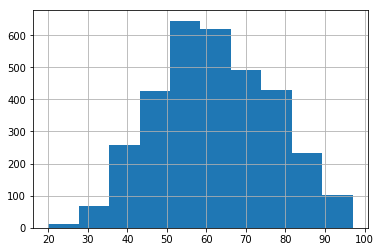

In [27]:
# histograms are a quick way to visualize the distribution
nyc.Mean_Humidity.hist();

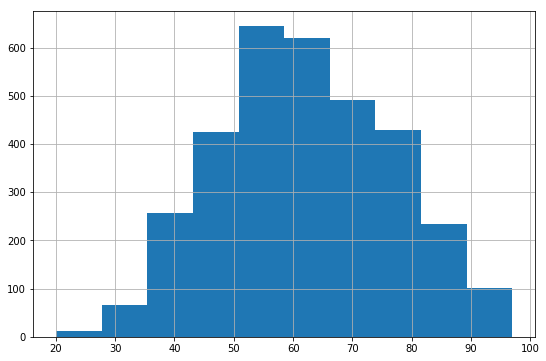

In [28]:
# add in figsize=(width,height) to boost size
nyc.Mean_Humidity.hist(figsize=(9, 6));

In [ ]:
# If we use the .plot method we can add title and other attributes
nyc.Mean_Humidity.plot(kind='hist', title='Avg Humidity', figsize=(14, 10))

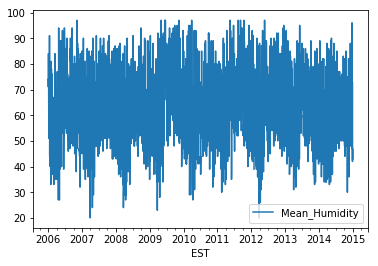

In [30]:
nyc.plot(x='EST', y='Mean_Humidity');

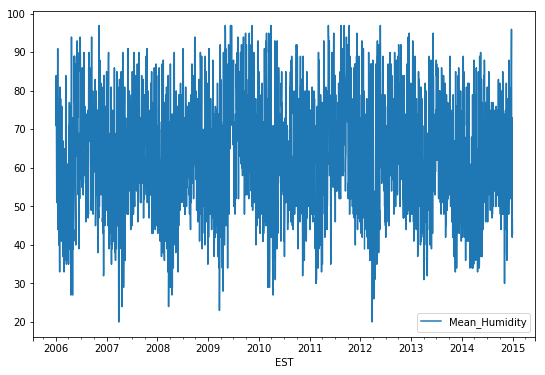

In [34]:
nyc.plot(x='EST', y='Mean_Humidity', figsize=(9, 6));

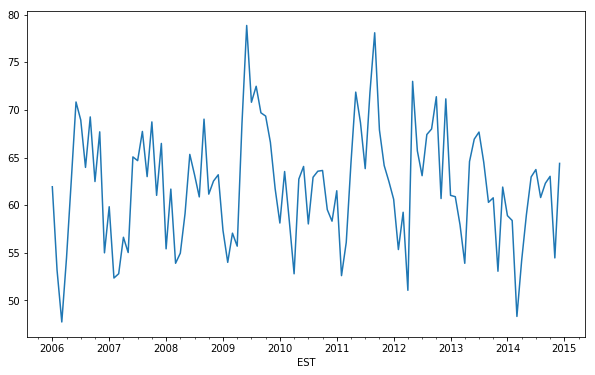

In [35]:
# Can resample columns, since our index is a date we can use *Offset Aliases*
# see http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
nyc.set_index('EST').Mean_Humidity.resample('M').mean().plot(figsize=(10, 6));

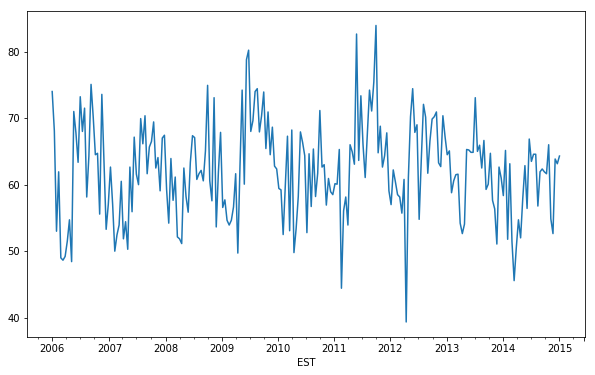

In [36]:
# Can resample columns, since our index is a date we can use *Offset Aliases*
# see http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
(
nyc
    .set_index('EST')
    .Mean_Humidity
    .resample('2W')
    .mean()
    .plot(figsize=(10, 6)) 
);

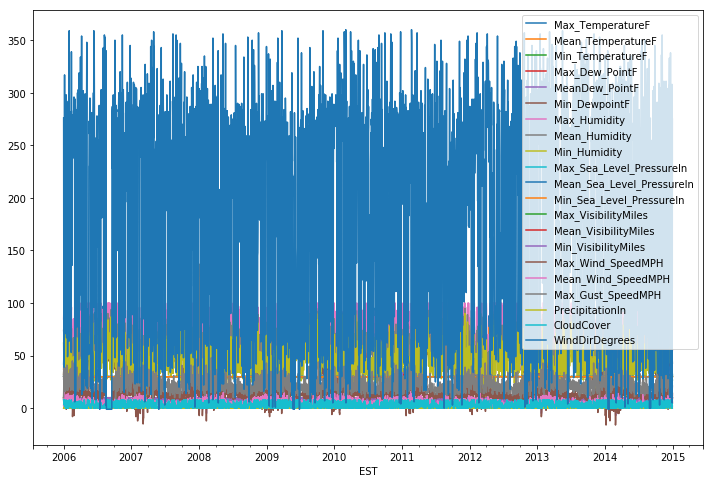

In [37]:
# Plot all the things (may be useful or just art)
nyc.set_index('EST').plot(figsize=(12,8))

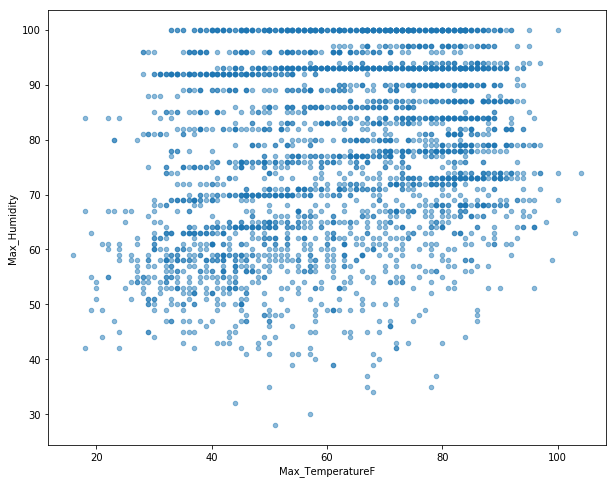

In [38]:
nyc.plot(x='Max_TemperatureF', y='Max_Humidity', kind='scatter', alpha=.5, 
        figsize=(10, 8))

In [39]:
nyc.Max_TemperatureF.corr(nyc.Max_Humidity)

0.2739156120229223

## Plotting Assignment
With the nino dataset:
* Plot a histogram of air temp
* Plot a scatter plot of latitude and longitude


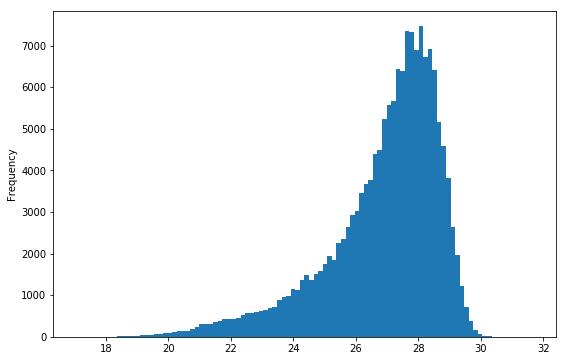

In [46]:
nino['air_temp_'].plot(kind='hist', figsize=(9,6), bins=100);

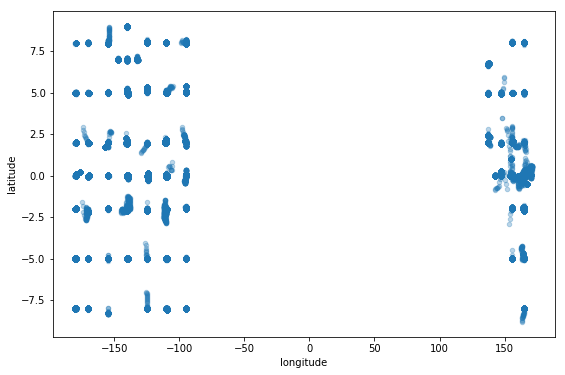

In [54]:
nino.plot(kind='scatter', y='latitude', x='longitude', figsize=(9,6), alpha=0.3);

# Filtering

In [55]:
nyc[nyc.EST.dt.year > 2010]

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
1826,2011-01-01,53.00,47.00,40.00,46.00,35.00,29.00,83.00,67.00,50.00,...,7.00,6.00,5.00,12.00,3.00,16.00,0.00,3.00,,250.00
1827,2011-01-02,52.00,44.00,35.00,48.00,41.00,20.00,100.00,73.00,45.00,...,10.00,5.00,0.00,20.00,5.00,28.00,0.01,8.00,Fog-Rain,299.00
1828,2011-01-03,36.00,32.00,28.00,18.00,12.00,9.00,53.00,44.00,35.00,...,10.00,10.00,10.00,21.00,9.00,30.00,0.00,0.00,,288.00
1829,2011-01-04,39.00,36.00,32.00,20.00,16.00,12.00,52.00,47.00,40.00,...,10.00,10.00,8.00,10.00,6.00,18.00,0.00,1.00,,231.00
1830,2011-01-05,39.00,34.00,29.00,22.00,17.00,11.00,61.00,50.00,39.00,...,10.00,10.00,10.00,15.00,6.00,20.00,0.00,1.00,,279.00
1831,2011-01-06,33.00,30.00,26.00,16.00,15.00,12.00,63.00,54.00,45.00,...,10.00,10.00,10.00,9.00,3.00,13.00,0.00,5.00,,302.00
1832,2011-01-07,33.00,29.00,25.00,32.00,25.00,15.00,92.00,71.00,49.00,...,10.00,4.00,0.00,12.00,5.00,16.00,0.19,7.00,Fog-Snow,194.00
1833,2011-01-08,31.00,27.00,23.00,21.00,19.00,17.00,81.00,75.00,69.00,...,10.00,7.00,2.00,12.00,4.00,15.00,0.00,6.00,Snow,282.00
1834,2011-01-09,32.00,29.00,26.00,17.00,13.00,12.00,75.00,61.00,47.00,...,10.00,10.00,10.00,21.00,11.00,29.00,0.00,1.00,,281.00
1835,2011-01-10,35.00,30.00,24.00,16.00,14.00,11.00,63.00,53.00,43.00,...,10.00,10.00,10.00,18.00,9.00,26.00,0.00,0.00,,284.00


In [56]:
# When we apply a conditional operator to a series we get back a series of True/False values
# We call this a "mask", which we can use to filter (similar to Photoshop)
# all EST in 2000's
m2000 = nyc.EST.dt.year >= 2000

# below 2010
lt2010 = nyc.EST.dt.year < 2010

In [57]:
# The "and" operation looks at whether the operands are truthy or falsey
# This is a case where normal Python syntax doesn't work
nyc[m2000 and lt2010]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [58]:
# & does bitwise comparisons - which is what we want - combine the two 'masks'
nyc[m2000 & lt2010]

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2006-01-01,42.00,37.00,32.00,32.00,30.00,28.00,85.00,74.00,62.00,...,10.00,10.00,8.00,9.00,3.00,10.00,0.00,8.00,,276.00
1,2006-01-02,48.00,44.00,39.00,38.00,34.00,29.00,92.00,71.00,49.00,...,10.00,8.00,4.00,18.00,5.00,24.00,0.63,5.00,Rain,76.00
2,2006-01-03,40.00,37.00,33.00,38.00,33.00,26.00,92.00,84.00,75.00,...,10.00,7.00,2.00,28.00,15.00,41.00,1.13,8.00,Rain,39.00
3,2006-01-04,38.00,34.00,29.00,36.00,26.00,19.00,85.00,72.00,59.00,...,10.00,10.00,4.00,15.00,7.00,20.00,0.00,3.00,,70.00
4,2006-01-05,50.00,44.00,37.00,38.00,35.00,32.00,92.00,71.00,50.00,...,10.00,6.00,2.00,15.00,5.00,21.00,0.05,6.00,Rain,251.00
5,2006-01-06,43.00,37.00,30.00,33.00,24.00,14.00,73.00,60.00,47.00,...,10.00,10.00,10.00,17.00,6.00,25.00,0.00,7.00,,317.00
6,2006-01-07,35.00,30.00,25.00,19.00,14.00,11.00,60.00,51.00,41.00,...,10.00,10.00,10.00,15.00,7.00,23.00,0.00,2.00,,267.00
7,2006-01-08,46.00,40.00,34.00,35.00,25.00,19.00,70.00,56.00,41.00,...,10.00,10.00,10.00,13.00,5.00,17.00,0.00,3.00,,192.00
8,2006-01-09,60.00,52.00,43.00,39.00,36.00,30.00,76.00,60.00,44.00,...,10.00,10.00,10.00,15.00,8.00,24.00,0.00,1.00,,249.00
9,2006-01-10,49.00,45.00,41.00,31.00,28.00,26.00,62.00,52.00,42.00,...,10.00,10.00,10.00,10.00,6.00,16.00,0.00,1.00,,261.00


In [59]:
# beware if you embed the operations, the bitwise operator binds more tightly to the integers
nyc[nyc.EST.dt.year >= 2000 & nyc.EST.dt.year < 2010]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [60]:
# beware if you embed the operations, the bitwise operator binds more tightly to the integers
nyc[(nyc.EST.dt.year >= 2000) & (nyc.EST.dt.year < 2010)]

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2006-01-01,42.00,37.00,32.00,32.00,30.00,28.00,85.00,74.00,62.00,...,10.00,10.00,8.00,9.00,3.00,10.00,0.00,8.00,,276.00
1,2006-01-02,48.00,44.00,39.00,38.00,34.00,29.00,92.00,71.00,49.00,...,10.00,8.00,4.00,18.00,5.00,24.00,0.63,5.00,Rain,76.00
2,2006-01-03,40.00,37.00,33.00,38.00,33.00,26.00,92.00,84.00,75.00,...,10.00,7.00,2.00,28.00,15.00,41.00,1.13,8.00,Rain,39.00
3,2006-01-04,38.00,34.00,29.00,36.00,26.00,19.00,85.00,72.00,59.00,...,10.00,10.00,4.00,15.00,7.00,20.00,0.00,3.00,,70.00
4,2006-01-05,50.00,44.00,37.00,38.00,35.00,32.00,92.00,71.00,50.00,...,10.00,6.00,2.00,15.00,5.00,21.00,0.05,6.00,Rain,251.00
5,2006-01-06,43.00,37.00,30.00,33.00,24.00,14.00,73.00,60.00,47.00,...,10.00,10.00,10.00,17.00,6.00,25.00,0.00,7.00,,317.00
6,2006-01-07,35.00,30.00,25.00,19.00,14.00,11.00,60.00,51.00,41.00,...,10.00,10.00,10.00,15.00,7.00,23.00,0.00,2.00,,267.00
7,2006-01-08,46.00,40.00,34.00,35.00,25.00,19.00,70.00,56.00,41.00,...,10.00,10.00,10.00,13.00,5.00,17.00,0.00,3.00,,192.00
8,2006-01-09,60.00,52.00,43.00,39.00,36.00,30.00,76.00,60.00,44.00,...,10.00,10.00,10.00,15.00,8.00,24.00,0.00,1.00,,249.00
9,2006-01-10,49.00,45.00,41.00,31.00,28.00,26.00,62.00,52.00,42.00,...,10.00,10.00,10.00,10.00,6.00,16.00,0.00,1.00,,261.00


In [61]:
m_dec = nyc.EST.dt.month == 12
nyc[m_dec]

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
334,2006-12-01,70.00,60.00,49.00,63.00,58.00,27.00,93.00,67.00,41.00,...,10.00,9.00,2.00,23.00,8.00,44.00,0.23,7.00,Rain,196.00
335,2006-12-02,49.00,44.00,39.00,28.00,24.00,20.00,57.00,46.00,34.00,...,10.00,10.00,10.00,21.00,8.00,37.00,0.00,0.00,,281.00
336,2006-12-03,46.00,41.00,35.00,29.00,23.00,19.00,57.00,47.00,36.00,...,10.00,10.00,10.00,13.00,5.00,20.00,0.00,0.00,,247.00
337,2006-12-04,41.00,36.00,31.00,25.00,17.00,10.00,59.00,46.00,32.00,...,10.00,10.00,10.00,18.00,7.00,32.00,0.00,2.00,,291.00
338,2006-12-05,37.00,33.00,29.00,18.00,13.00,10.00,53.00,44.00,35.00,...,10.00,10.00,10.00,17.00,6.00,26.00,0.00,2.00,,275.00
339,2006-12-06,49.00,40.00,31.00,35.00,25.00,18.00,61.00,50.00,39.00,...,10.00,10.00,10.00,17.00,6.00,30.00,0.00,1.00,,207.00
340,2006-12-07,53.00,40.00,26.00,36.00,27.00,8.00,65.00,50.00,35.00,...,10.00,10.00,10.00,21.00,7.00,38.00,0.00,4.00,,273.00
341,2006-12-08,29.00,24.00,18.00,14.00,4.00,-3.00,51.00,43.00,34.00,...,10.00,10.00,10.00,23.00,11.00,40.00,0.00,2.00,,291.00
342,2006-12-09,38.00,31.00,24.00,14.00,10.00,6.00,60.00,44.00,27.00,...,10.00,10.00,10.00,15.00,8.00,29.00,0.00,0.00,,246.00
343,2006-12-10,54.00,45.00,35.00,25.00,17.00,9.00,39.00,32.00,24.00,...,10.00,10.00,10.00,15.00,7.00,24.00,0.00,0.00,,251.00


In [62]:
# Can use loc to filter out based on index value, also takes a boolean index
# In fact, you should use .loc instead as a matter of habit (you won't see warnings)
# '.loc' allows filtering based on column name or row name
nyc.loc[m_dec]

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
334,2006-12-01,70.00,60.00,49.00,63.00,58.00,27.00,93.00,67.00,41.00,...,10.00,9.00,2.00,23.00,8.00,44.00,0.23,7.00,Rain,196.00
335,2006-12-02,49.00,44.00,39.00,28.00,24.00,20.00,57.00,46.00,34.00,...,10.00,10.00,10.00,21.00,8.00,37.00,0.00,0.00,,281.00
336,2006-12-03,46.00,41.00,35.00,29.00,23.00,19.00,57.00,47.00,36.00,...,10.00,10.00,10.00,13.00,5.00,20.00,0.00,0.00,,247.00
337,2006-12-04,41.00,36.00,31.00,25.00,17.00,10.00,59.00,46.00,32.00,...,10.00,10.00,10.00,18.00,7.00,32.00,0.00,2.00,,291.00
338,2006-12-05,37.00,33.00,29.00,18.00,13.00,10.00,53.00,44.00,35.00,...,10.00,10.00,10.00,17.00,6.00,26.00,0.00,2.00,,275.00
339,2006-12-06,49.00,40.00,31.00,35.00,25.00,18.00,61.00,50.00,39.00,...,10.00,10.00,10.00,17.00,6.00,30.00,0.00,1.00,,207.00
340,2006-12-07,53.00,40.00,26.00,36.00,27.00,8.00,65.00,50.00,35.00,...,10.00,10.00,10.00,21.00,7.00,38.00,0.00,4.00,,273.00
341,2006-12-08,29.00,24.00,18.00,14.00,4.00,-3.00,51.00,43.00,34.00,...,10.00,10.00,10.00,23.00,11.00,40.00,0.00,2.00,,291.00
342,2006-12-09,38.00,31.00,24.00,14.00,10.00,6.00,60.00,44.00,27.00,...,10.00,10.00,10.00,15.00,8.00,29.00,0.00,0.00,,246.00
343,2006-12-10,54.00,45.00,35.00,25.00,17.00,9.00,39.00,32.00,24.00,...,10.00,10.00,10.00,15.00,7.00,24.00,0.00,0.00,,251.00


In [63]:
# Can use loc to filter out based on index value, also takes a boolean index
# 2nd option in index op is column names (: to include everything)
nyc.loc[m_dec, [x for x in nyc.columns if 'Max' in x]]

,Max_TemperatureF,Max_Dew_PointF,Max_Humidity,Max_Sea_Level_PressureIn,Max_VisibilityMiles,Max_Wind_SpeedMPH,Max_Gust_SpeedMPH
334,70.00,63.00,93.00,29.96,10.00,23.00,44.00
335,49.00,28.00,57.00,30.38,10.00,21.00,37.00
336,46.00,29.00,57.00,30.47,10.00,13.00,20.00
337,41.00,25.00,59.00,30.17,10.00,18.00,32.00
338,37.00,18.00,53.00,30.40,10.00,17.00,26.00
339,49.00,35.00,61.00,30.39,10.00,17.00,30.00
340,53.00,36.00,65.00,30.05,10.00,21.00,38.00
341,29.00,14.00,51.00,30.34,10.00,23.00,40.00
342,38.00,14.00,60.00,30.38,10.00,15.00,29.00
343,54.00,25.00,39.00,30.32,10.00,15.00,24.00


In [64]:
# loc note:
# can use set_index and sort_index to do quick lookups (if you sort you get quick lookups)
nyc.set_index('Events').sort_index().head()

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Min_Sea_Level_PressureIn,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees
Events,,,,,,,,,,,,,,,,,,,,,
,2006-01-01,42.00,37.00,32.00,32.00,30.00,28.00,85.00,74.00,62.00,...,29.83,10.00,10.00,8.00,9.00,3.00,10.00,0.00,8.00,276.00
,2011-04-29,69.00,62.00,54.00,44.00,41.00,38.00,62.00,49.00,35.00,...,29.68,10.00,10.00,10.00,16.00,7.00,23.00,0.00,4.00,262.00
,2011-04-30,67.00,59.00,50.00,41.00,37.00,33.00,64.00,48.00,31.00,...,29.92,10.00,10.00,10.00,15.00,5.00,22.00,0.00,4.00,17.00
,2011-05-01,69.00,60.00,50.00,42.00,39.00,35.00,74.00,53.00,32.00,...,30.23,10.00,10.00,10.00,13.00,5.00,18.00,0.00,0.00,133.00
,2011-05-02,63.00,57.00,50.00,50.00,45.00,39.00,83.00,72.00,60.00,...,30.13,10.00,10.00,10.00,10.00,5.00,16.00,0.00,5.00,131.00


In [65]:
nyc.set_index('Events').sort_index().loc['Fog']

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Min_Sea_Level_PressureIn,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees
Events,,,,,,,,,,,,,,,,,,,,,
Fog,2013-01-13,50.00,47.00,43.00,49.00,44.00,42.00,100.00,93.00,86.00,...,30.01,10.00,4.00,0.00,12.00,3.00,18.00,0.00,8.00,160.00
Fog,2006-05-27,82.00,72.00,64.00,65.00,62.00,58.00,100.00,79.00,45.00,...,29.60,10.00,4.00,0.00,10.00,3.00,18.00,0.01,3.00,19.00
Fog,2009-03-02,28.00,22.00,16.00,27.00,17.00,2.00,96.00,75.00,54.00,...,29.83,10.00,4.00,0.00,20.00,11.00,32.00,0.49,8.00,352.00
Fog,2011-03-22,50.00,45.00,40.00,39.00,32.00,26.00,100.00,71.00,42.00,...,29.85,10.00,8.00,0.00,16.00,9.00,25.00,0.00,6.00,301.00
Fog,2011-05-24,81.00,74.00,66.00,70.00,64.00,59.00,100.00,76.00,51.00,...,29.54,10.00,6.00,0.00,13.00,5.00,18.00,0.00,5.00,253.00
Fog,2006-03-13,62.00,56.00,50.00,52.00,50.00,48.00,100.00,84.00,67.00,...,29.55,7.00,3.00,0.00,14.00,4.00,28.00,0.00,4.00,77.00
Fog,2012-11-12,66.00,57.00,48.00,58.00,52.00,46.00,100.00,84.00,67.00,...,30.19,10.00,6.00,0.00,15.00,4.00,24.00,0.00,3.00,182.00
Fog,2012-10-03,73.00,68.00,63.00,68.00,66.00,63.00,100.00,92.00,84.00,...,29.99,5.00,3.00,0.00,6.00,2.00,9.00,0.00,7.00,52.00
Fog,2007-07-30,86.00,78.00,70.00,70.00,69.00,66.00,97.00,74.00,51.00,...,29.90,10.00,3.00,0.00,8.00,2.00,14.00,0.00,3.00,311.00


In [66]:
# Can use iloc to filter out based on index(row/column) location (or position)
# 2nd option in index op is column indices
nyc.iloc[5:10, [2, 5, -2]] # row, column

,Mean_TemperatureF,MeanDew_PointF,Events
5,37.00,24.00,
6,30.00,14.00,
7,40.00,25.00,
8,52.00,36.00,
9,45.00,28.00,


In [67]:
# Can use iloc to filter out based on index location
# 2nd option in index op is column indices
nyc.iloc[:, [2, 5, -2]]

,Mean_TemperatureF,MeanDew_PointF,Events
0,37.00,30.00,
1,44.00,34.00,Rain
2,37.00,33.00,Rain
3,34.00,26.00,
4,44.00,35.00,Rain
5,37.00,24.00,
6,30.00,14.00,
7,40.00,25.00,
8,52.00,36.00,
9,45.00,28.00,


In [ ]:
nyc.EST.describe()

## Filtering Assignment
Using the nino dataframe:
* Create a mask, ``m80``, that all years >= 1980 and < 1990
* Create a mask, ``m90``, that all years >= 1990 and < 2000
* Create a mask, ``lon120``, that has all longitudes > 120
* Create a mask, ``lat0``, that has latitudes > -2 and < 2
* Create a dataframe, ``df80``, that has only those values in ``m80`` and ``lon120`` and ``lat0``
* Create a dataframe, ``df90``, that has only those values in ``m90`` and ``lon120`` and ``lat0``


In [68]:
nino.head(2)

,year_month_day,date,latitude,longitude,zon_winds,mer_winds,humidity,air_temp_,s_s_temp_,air_temp_F,zon_winds_mph,mer_winds_mph
0,1980-03-07,800307,-0.02,-109.46,-6.80,0.70,nan,26.14,26.24,79.05,-15.21,1.57
1,1980-03-08,800308,-0.02,-109.46,-4.90,1.10,nan,25.66,25.97,78.19,-10.96,2.46


In [72]:
nino.dtypes

year_month_day    datetime64[ns]
date                       int64
latitude                 float64
longitude                float64
zon_winds                float64
mer_winds                float64
humidity                 float64
air_temp_                float64
s_s_temp_                float64
air_temp_F               float64
zon_winds_mph            float64
mer_winds_mph            float64
dtype: object

In [78]:
m80 = (nino.year_month_day.dt.year >= 1980) & (nino.year_month_day.dt.year < 1990)
m90 = (nino.year_month_day.dt.year >= 1990) & (nino.year_month_day.dt.year < 2000)
lon120 = nino.latitude > 120
lat0 = (nino.latitude > -2) & (nino.latitude < 2)

In [84]:
nino[m80 & lon120 & lat0].plot.scatter(alpha=.5, 
        figsize=(10, 8))

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

In [85]:
nino[m90 & lon120 & lat0]

,year_month_day,date,latitude,longitude,zon_winds,mer_winds,humidity,air_temp_,s_s_temp_,air_temp_F,zon_winds_mph,mer_winds_mph


## Filtering Bonus Assignment
* Create a mask, ``m80_2``, that uses a function to filter years >= 1980 and < 1990
* Make sure that ``m80`` is created using operations
* Use the ``%%time`` *cell magic* to determine which is faster to calculate, ``m80`` or ``m80_2``

# Dealing with NaN

In [87]:
# determine if any columns have missing values
# True if even 1 value missing, axis=0
nyc.isnull().any()

EST                          False
Max_TemperatureF              True
Mean_TemperatureF             True
Min_TemperatureF              True
Max_Dew_PointF                True
MeanDew_PointF                True
Min_DewpointF                 True
Max_Humidity                  True
Mean_Humidity                 True
Min_Humidity                  True
Max_Sea_Level_PressureIn      True
Mean_Sea_Level_PressureIn     True
Min_Sea_Level_PressureIn      True
Max_VisibilityMiles           True
Mean_VisibilityMiles          True
Min_VisibilityMiles           True
Max_Wind_SpeedMPH             True
Mean_Wind_SpeedMPH            True
Max_Gust_SpeedMPH             True
PrecipitationIn               True
CloudCover                    True
Events                       False
WindDirDegrees                True
dtype: bool

In [86]:
# determine if any rows have missing alues
nyc.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
3257    False
3258    False
3259    False
3260    False
3261    False
3262    False
3263    False
3264    False
3265    False
3266    False
3267    False
3268    False
3269    False
3270    False
3271    False
3272    False
3273    False
3274    False
3275    False
3276    False
3277    False
3278    False
3279    False
3280    False
3281    False
3282    False
3283    False
3284    False
3285    False
3286    False
Length: 3287, dtype: bool

In [ ]:
nyc.isnull().mean()

In [ ]:
# find rows that have null data
# fish create a mask
nyc.isnull().any(axis=1)

In [ ]:
nyc[nyc.isnull().any(axis=1)]

In [88]:
missing_df = nyc.isnull() 
nyc[missing_df.Max_TemperatureF]

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
2219,2012-01-29,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,0.00,nan,,nan
2220,2012-01-30,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,,nan


In [ ]:
nyc.Max_TemperatureF.fillna(nyc.Max_TemperatureF.mean()).iloc[2219:2222]

In [ ]:
# The .interpolate method will do linear interpolation by default
nyc.Max_TemperatureF.interpolate().iloc[2219:2222]

In [ ]:
#dropping rows with missing data
nyc.dropna()

## Dealing with NaN Assignment
With the nino dataset:
* Find the rows that have null data
* Find the columns that have null data
* It looks like the ``zon_winds`` has some missing values, use summary stats or plotting to determine how to fill in those values